In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore Warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the csv file.
loan = pd.read_csv("C:/Users/krish/Downloads/loan/loan.csv")
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Cleaning

In [3]:
# DataFrame Shape
loan.shape

(39717, 111)

### Step - 1: Delete Unnecessary Rows and Columns

In [4]:
# Percentage of NULL values in each column
for i in loan.columns:    
    print(f"{i} => {100*loan[i].isnull().mean()}")

id => 0.0
member_id => 0.0
loan_amnt => 0.0
funded_amnt => 0.0
funded_amnt_inv => 0.0
term => 0.0
int_rate => 0.0
installment => 0.0
grade => 0.0
sub_grade => 0.0
emp_title => 6.191303472064859
emp_length => 2.7066495455346575
home_ownership => 0.0
annual_inc => 0.0
verification_status => 0.0
issue_d => 0.0
loan_status => 0.0
pymnt_plan => 0.0
url => 0.0
desc => 32.58050708764509
purpose => 0.0
title => 0.027695948838029054
zip_code => 0.0
addr_state => 0.0
dti => 0.0
delinq_2yrs => 0.0
earliest_cr_line => 0.0
inq_last_6mths => 0.0
mths_since_last_delinq => 64.66248709620565
mths_since_last_record => 92.98537150338646
open_acc => 0.0
pub_rec => 0.0
revol_bal => 0.0
revol_util => 0.12589067653649572
total_acc => 0.0
initial_list_status => 0.0
out_prncp => 0.0
out_prncp_inv => 0.0
total_pymnt => 0.0
total_pymnt_inv => 0.0
total_rec_prncp => 0.0
total_rec_int => 0.0
total_rec_late_fee => 0.0
recoveries => 0.0
collection_recovery_fee => 0.0
last_pymnt_d => 0.1787647606818239
last_pymnt_amn

#### Analysis of Missing Data

- A large portion of the columns (over 100% null values) can be safely removed.
- Some columns have varying degrees of missing data (2%, 33%, 65%, 93%, and 97%). 
- Columns with extremely high missing values (93% and 97%) are also candidates for removal.

In [5]:
# Dropping all columns which have 100% null values 
loan = loan.dropna(axis=1, how='all')

In [6]:
# There are few columns which have only single value repeated, will remove them as they cannot contribute to our analysis
single_valued_cols = []
for i in loan.columns:
    if loan[i].nunique() == 1:
        single_valued_cols.append(i)
print(single_valued_cols)
loan = loan.drop(single_valued_cols, axis=1)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [7]:
loan.shape

(39717, 48)

In [8]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

#### Currently we have 48 columns, from which few columns have post approval of loan data which is not required in the analysis.

    - delinq_2yrs
    - mths_since_last_delinq
    - mths_since_last_record
    - revol_bal
    - out_prncp
    - total_pymnt
    - total_rec_prncp
    - total_rec_int
    - total_rec_late_fee
    - recoveries
    - collection_recovery_fee
    - last_pymnt_d
    - last_pymnt_amnt
    - next_pymnt_d
   
#### Few other columns which are irrelevant to our problem statement, they do not contribute to understanding loan defaulting

    - id
    - member_id
    - url
    - desc
    - title
    - emp_title
    - zip_code
    - last_credit_pull_d
    - addr_state
    - "out_prncp_inv" and "total_pymnt_inv" are beneficial for investors but not for loan default analysis

In [9]:
# Dropping the above columns
loan.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d",
                  "desc","out_prncp_inv","total_pymnt_inv", "delinq_2yrs", "revol_bal",
                  "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", 
                  "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , 
                  "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True )

In [10]:
loan.shape

(39717, 24)

### Step-2: Dealing with Null Values

In [11]:
for i in loan.columns:    
    print(f"{i} => {100*loan[i].isnull().mean()}")

loan_amnt => 0.0
funded_amnt => 0.0
funded_amnt_inv => 0.0
term => 0.0
int_rate => 0.0
installment => 0.0
grade => 0.0
sub_grade => 0.0
emp_length => 2.7066495455346575
home_ownership => 0.0
annual_inc => 0.0
verification_status => 0.0
issue_d => 0.0
loan_status => 0.0
purpose => 0.0
addr_state => 0.0
dti => 0.0
earliest_cr_line => 0.0
inq_last_6mths => 0.0
open_acc => 0.0
pub_rec => 0.0
revol_util => 0.12589067653649572
total_acc => 0.0
pub_rec_bankruptcies => 1.7549160309187504


In [12]:
loan.emp_length.mode()

0    10+ years
Name: emp_length, dtype: object

In [13]:
loan.emp_length.fillna(loan.emp_length.mode()[0], inplace = True)
loan.emp_length.isna().sum()

0

In [14]:
loan.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan.revol_util.isna().sum()

0

In [15]:
loan.pub_rec_bankruptcies.median()

0.0

In [16]:
loan.pub_rec_bankruptcies.fillna(loan.pub_rec_bankruptcies.median(), inplace = True)
loan.pub_rec_bankruptcies.isna().sum()

0

### Step - 3: Filtering Data
* The data dictionary specifies that home_ownership should only contain the values RENT, OWN, MORTGAGE, or OTHER. However, we found 3 records with the value "NONE". Since these are a small number and likely represent errors, we'll remove these rows to ensure data consistency with the data dictionary.

In [17]:
loan = loan[loan.home_ownership != 'NONE']
loan.drop_duplicates(keep = 'first', inplace = True)

### Step - 4: Fixing values of column like % in int_rate, revol_util

In [18]:
loan['int_rate'] = loan['int_rate'].str[:-1]
loan['revol_util'] = loan['revol_util'].str[:-1]

### Step - 5: Fixing Rows and Columns renaming int_rate to int_rate_percent and revol_util to revol_util_percent

In [19]:
loan.rename(columns = {'int_rate': 'int_rate_percent', 'revol_util': 'revol_util_percent'}, inplace = True)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util_percent,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,credit_card,AZ,27.65,Jan-85,1,3,0,83.70,9,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,car,GA,1.00,Apr-99,5,3,0,9.40,4,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,small_business,IL,8.72,Nov-01,2,2,0,98.50,10,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,other,CA,20.00,Feb-96,1,10,0,21,37,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,other,OR,17.94,Jan-96,0,15,0,53.90,38,0.0


### Step - 6: Fixing Invalid Values converting datatype of int_rate_percent, revol_util from object to float64

In [20]:
loan['int_rate_percent'] = pd.to_numeric(loan.int_rate_percent)
loan['revol_util_percent'] = pd.to_numeric(loan.revol_util_percent)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util_percent,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,credit_card,AZ,27.65,Jan-85,1,3,0,83.7,9,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,car,GA,1.00,Apr-99,5,3,0,9.4,4,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,small_business,IL,8.72,Nov-01,2,2,0,98.5,10,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,other,CA,20.00,Feb-96,1,10,0,21.0,37,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,other,OR,17.94,Jan-96,0,15,0,53.9,38,0.0


## Outlier Treatment
- Considering only continous features for outliers which are 'loan_amnt','funded_amnt','funded_amnt_inv','int_rate_percent','annual_inc','dti' 

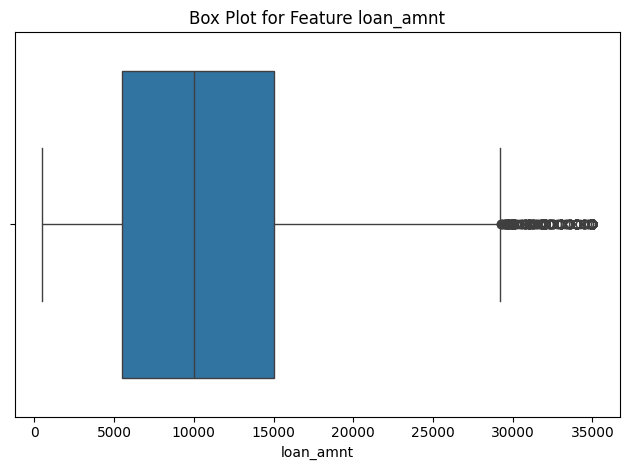

0.85    20000.0
0.90    22000.0
0.95    25000.0
0.97    30000.0
0.98    31500.0
0.99    35000.0
Name: loan_amnt, dtype: float64


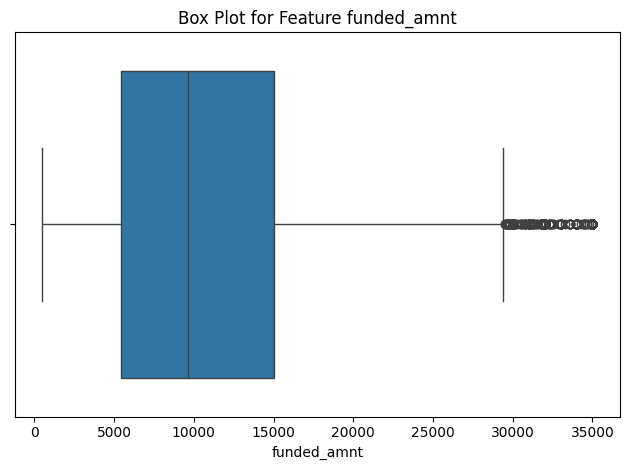

0.85    18800.0
0.90    21000.0
0.95    25000.0
0.97    28000.0
0.98    30000.0
0.99    35000.0
Name: funded_amnt, dtype: float64


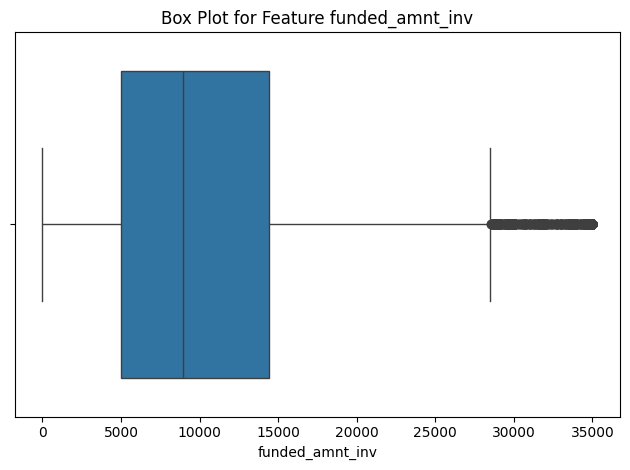

0.85    17950.000000
0.90    20000.000000
0.95    24739.211389
0.97    27025.000000
0.98    29975.000000
0.99    34750.000000
Name: funded_amnt_inv, dtype: float64


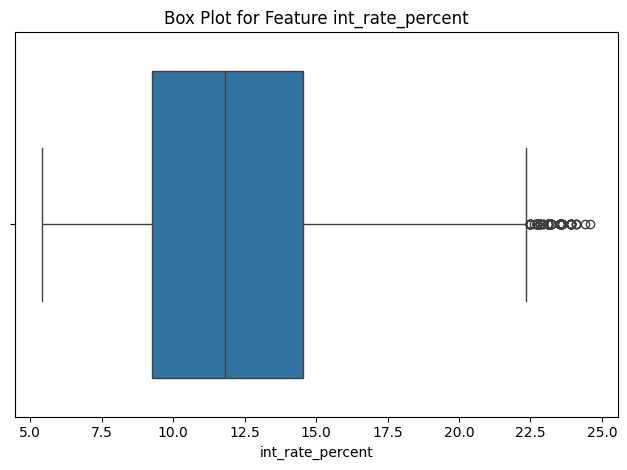

0.85    15.99
0.90    16.89
0.95    18.54
0.97    19.42
0.98    20.25
0.99    20.99
Name: int_rate_percent, dtype: float64


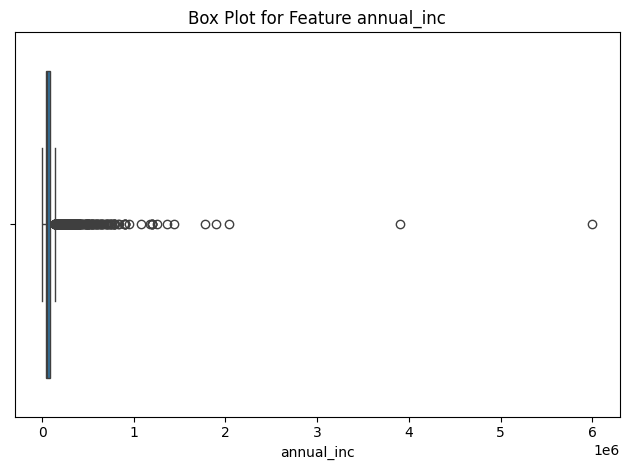

0.85    100000.00
0.90    116000.00
0.95    142000.00
0.97    165996.00
0.98    187000.00
0.99    234997.48
Name: annual_inc, dtype: float64


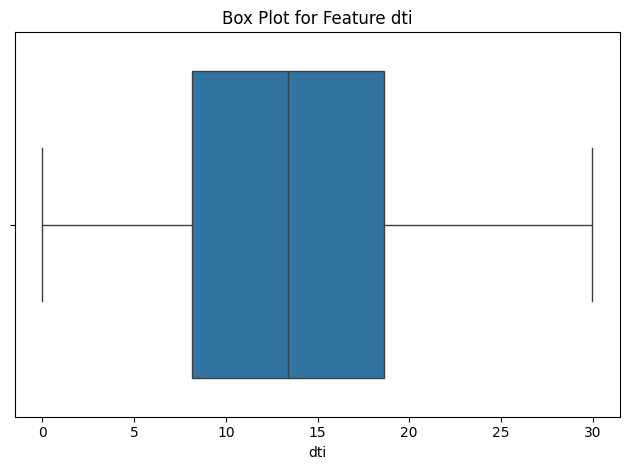

0.85    20.96
0.90    22.34
0.95    23.84
0.97    24.54
0.98    24.88
0.99    26.68
Name: dti, dtype: float64


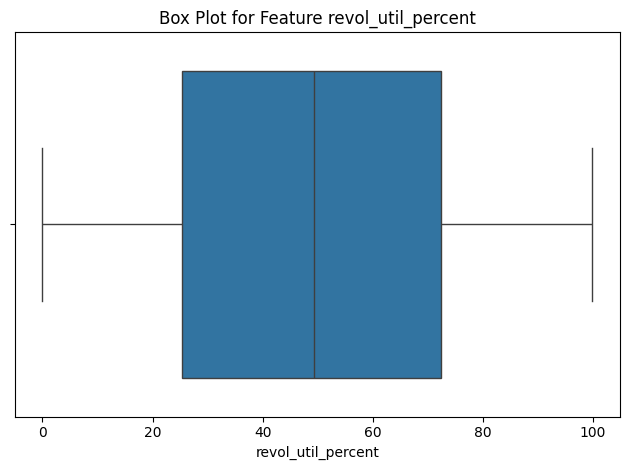

0.85    82.4
0.90    87.8
0.95    93.5
0.97    95.9
0.98    97.1
0.99    98.5
Name: revol_util_percent, dtype: float64


In [21]:
outlier_cols = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate_percent','annual_inc','dti','revol_util_percent']
for i in outlier_cols:   
    sns.boxplot(x = i,data = loan)
    plt.title(f"Box Plot for Feature {i}")
    plt.xlabel(i)
    plt.tight_layout()
    plt.show()
    print(loan[i].quantile([0.85,0.90,0.95,0.97,0.98,0.99]))

##### For 'loan_amnt','funded_amnt','funded_amnt_inv','int_rate','dti','revol_util' data is uniformly continous except for 'annual_income' so need to perform treartment for it.

Statistics of annual income:
count    3.966400e+04
mean     6.899864e+04
std      6.379074e+04
min      4.000000e+03
25%      4.051716e+04
50%      5.900000e+04
75%      8.240000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


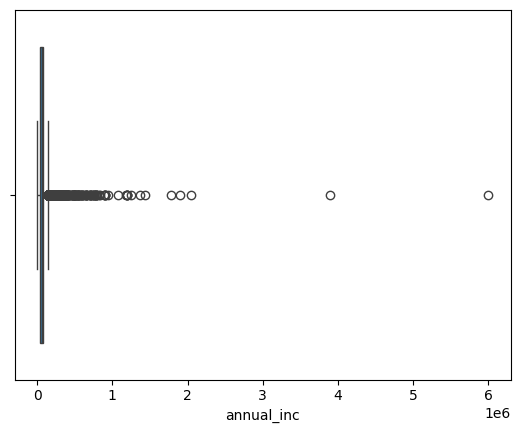

In [22]:
# Removing Outliers for feature = annual_inc

print(f"Statistics of annual income:\n{loan['annual_inc'].describe()}")
sns.boxplot(x="annual_inc", data=loan)
plt.show()

##### Due to significant outliers (max 87x greater than mean, 102x greater than median), annual income data will be cleaned by removing points above the 99th percentile

99th percentile of annual income: 234997.48


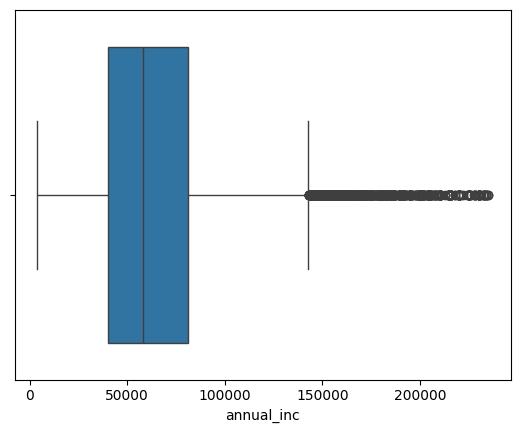

In [23]:
print(f"99th percentile of annual income: {loan['annual_inc'].quantile(0.99):.2f}")

loan = loan[loan['annual_inc'] < loan['annual_inc'].quantile(0.99)]
sns.boxplot(x="annual_inc", data=loan)
plt.show()

##  Derived Metrics

In [24]:
# Deriving new metric "issue_yr" , "issue_m" from existing variable "issue_d"
loan[['issue_month', 'issue_year']] = loan['issue_d'].str.split('-', expand=True)
loan['issue_year'] = "20"+loan['issue_year']
loan['issue_year'] = loan['issue_year'].astype(int)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_length,home_ownership,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util_percent,total_acc,pub_rec_bankruptcies,issue_month,issue_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,27.65,Jan-85,1,3,0,83.7,9,0.0,Dec,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,1.00,Apr-99,5,3,0,9.4,4,0.0,Dec,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,8.72,Nov-01,2,2,0,98.5,10,0.0,Dec,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,20.00,Feb-96,1,10,0,21.0,37,0.0,Dec,2011
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,17.94,Jan-96,0,15,0,53.9,38,0.0,Dec,2011


In [25]:
bin_edges = [500, 7000, 15000, 22000, 29000, 35000]
bin_labels = ['500-7k', '7k-15k', '15k-22k', '22k-29k', '29k-35k']
loan['funded_amnt_range'] =  pd.cut(loan['funded_amnt'], bins=bin_edges, labels=bin_labels)

bin_edges = [0, 5, 10, 15, 20, 25, 30]
bin_labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']
loan['dti_range'] =  pd.cut(loan['dti'], bins=bin_edges, labels=bin_labels)

bin_edges = [0, 250, 500, 750, 1000, 1306]
bin_labels = ['0-250', '250-500', '500-750', '7500-1000', '1000-1300']
loan['installment_range'] =  pd.cut(loan['installment'], bins=bin_edges, labels=bin_labels)

bin_edges = [0, 50000, 100000, 150000, 200000, 250000]
bin_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k']
loan['annual_inc_range'] =  pd.cut(loan['annual_inc'], bins=bin_edges, labels=bin_labels)

bin_edges = [5, 9, 13,17, 21, 25]
bin_labels = ['5%-9%', '9%-13%', '13%-17%', '17%-21%', '21%-25%']
loan['int_rate_percent_range'] =  pd.cut(loan['int_rate_percent'], bins=bin_edges, labels=bin_labels)

## Univariate Analysis

In [26]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate_percent', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util_percent',
       'total_acc', 'pub_rec_bankruptcies', 'issue_month', 'issue_year',
       'funded_amnt_range', 'dti_range', 'installment_range',
       'annual_inc_range', 'int_rate_percent_range'],
      dtype='object')

In [27]:
# comparing data between loan_amnt and funded_amnt
loan[loan.loan_amnt != loan.funded_amnt].loan_amnt.count()

1820

##### Due to 1,820 discrepancies between loan_amnt and funded_amnt (possibly caused by unupdated loan amount reductions), funded_amnt, the final disbursed amount, is the more reliable variable for data analysis.

In [28]:
# will be removing rows from loan_status where it's value is 'Current' as this data cannot help in our analysis
loan = loan[loan['loan_status'] != "Current"]

###          Exploring Unordered Categorical Variables

    - loan_status
    - home_ownership
    - purpose
    - addr_state

In [29]:
loan.shape

(38141, 31)

Fully Paid     32573
Charged Off     5568
Name: loan_status, dtype: int64


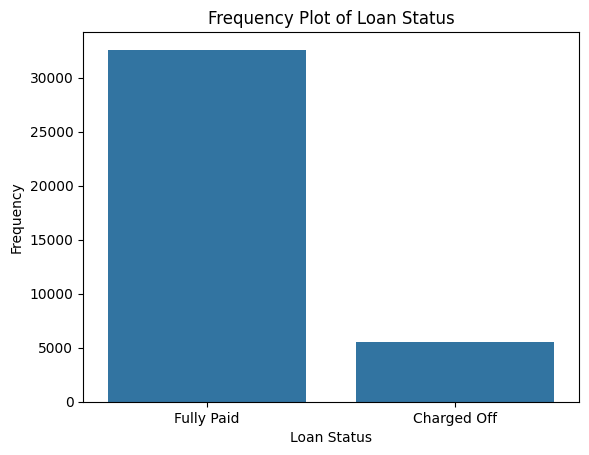

In [30]:
# For Unordered Categorical Variable 'loan_status'
print(loan['loan_status'].value_counts())

plt.title('Frequency Plot of Loan Status')
sns.countplot(x = 'loan_status',  data = loan)
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.show()

##### Inference: 
- Approximately 14.6% of loans are defaulted ,thus focussing on Charged Off gives us insights in taking decision 


RENT        18365
MORTGAGE    16740
OWN          2942
OTHER          94
Name: home_ownership, dtype: int64

Value counts for charged off
RENT        2814
MORTGAGE    2298
OWN          438
OTHER         18
Name: home_ownership, dtype: int64


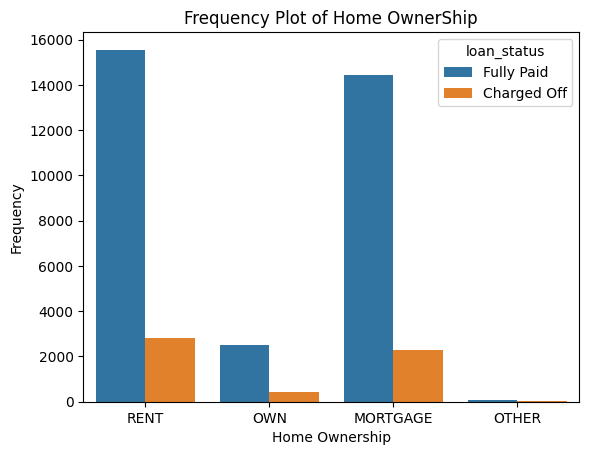

In [31]:
# For Unordered Categorical Variable 'home_ownership'
print(loan['home_ownership'].value_counts())
print("\nValue counts for charged off")
print(loan[loan['loan_status'] == "Charged Off"]['home_ownership'].value_counts())

plt.title('Frequency Plot of Home OwnerShip')
sns.countplot(x = 'home_ownership', data=loan, hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.show()

##### Inference:
- Applicants with Own house are likely to payback than RENT and MORtGAGE Home_ownership.
- RENT ,MORtGAGE can be used for further analysis

debt_consolidation    17904
credit_card            4985
other                  3817
home_improvement       2792
major_purchase         2124
small_business         1722
car                    1490
wedding                 916
medical                 672
moving                  568
vacation                374
house                   357
educational             320
renewable_energy        100
Name: purpose, dtype: int64

Value counts for charged off
debt_consolidation    2747
other                  625
credit_card            536
small_business         472
home_improvement       335
major_purchase         219
car                    159
medical                105
wedding                 94
moving                  91
house                   58
educational             55
vacation                53
renewable_energy        19
Name: purpose, dtype: int64


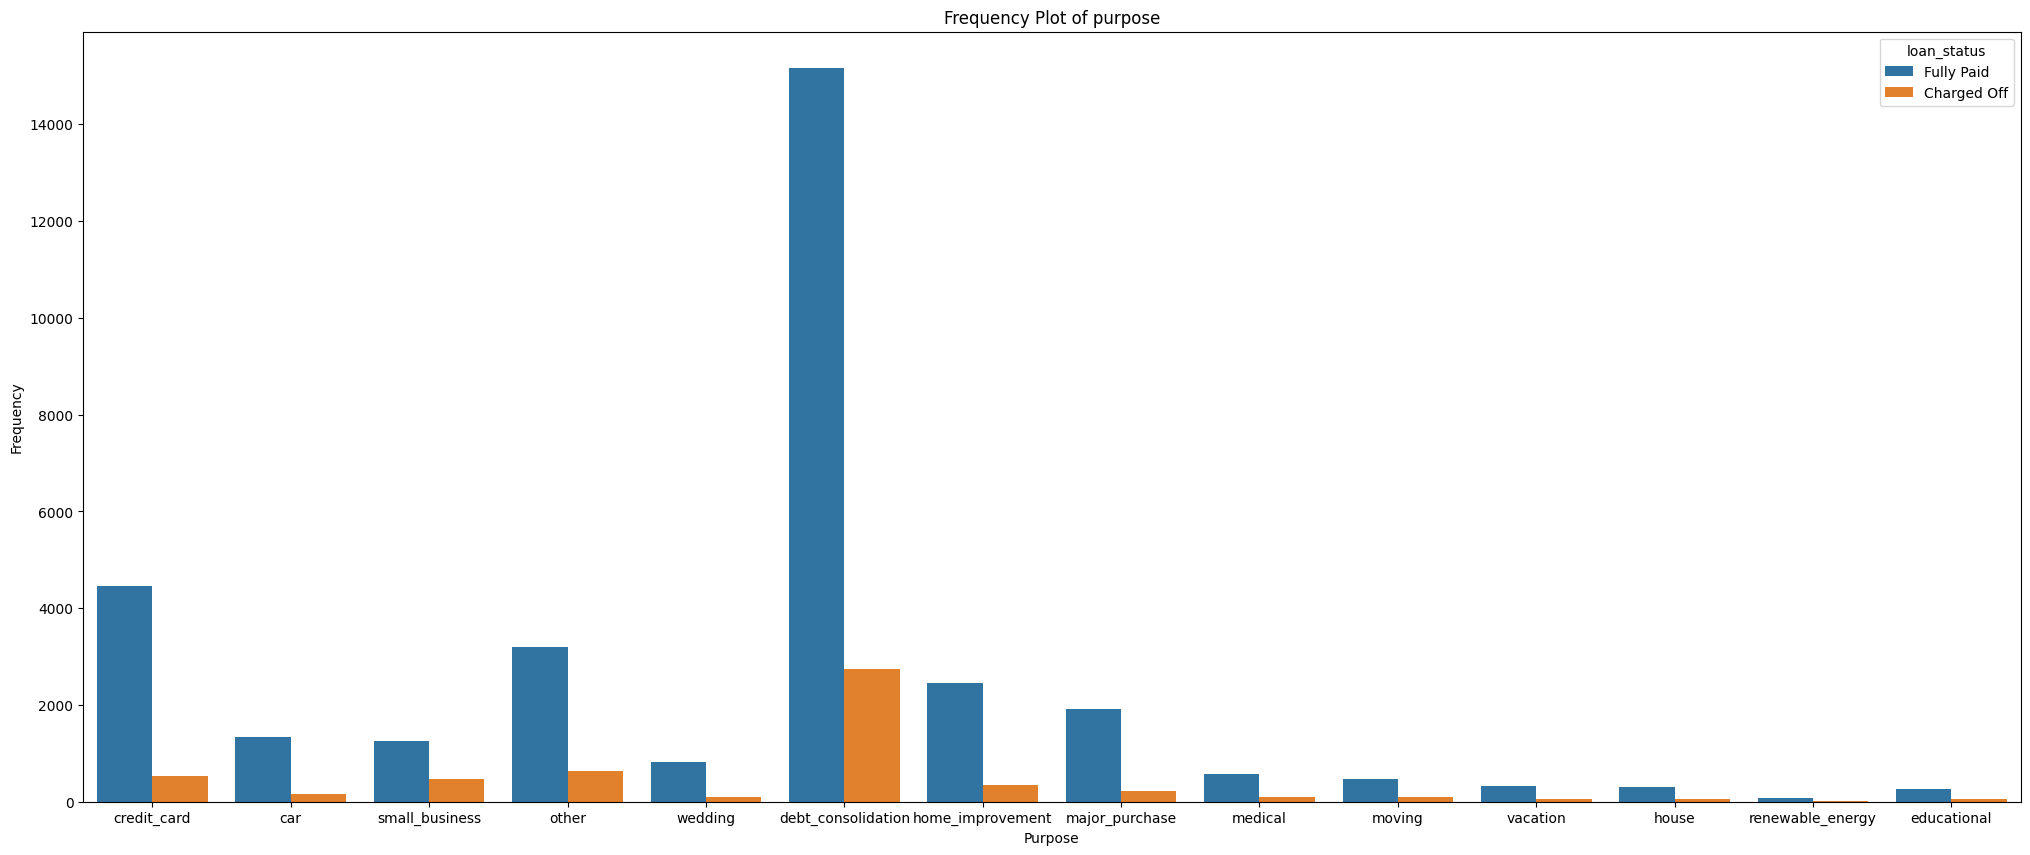

In [32]:
# For Unordered Categorical Variable 'purpose'
print(loan['purpose'].value_counts())
print("\nValue counts for charged off")
print(loan[loan['loan_status'] == "Charged Off"]['purpose'].value_counts())

plt.figure(figsize=(25,10))
plt.title('Frequency Plot of purpose')
sns.countplot(x = 'purpose', data=loan, hue='loan_status')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.show()

##### Infrence: Majority of people are acquiring loans for below reasons
- To clear other debts(debt_consolidation,credit card) which is why they are not able to manage finances and loan getting charged off.
- To start up a small business loan is acquired and used as investment. In both the above reasons risk factor is high due to unpredictable income


Value counts for charged off
CA    1115
FL     496
NY     488
TX     311
NJ     277
GA     215
IL     196
PA     177
VA     175
MD     160
MA     156
OH     151
WA     127
AZ     120
NC     114
MO     113
NV     107
MI     102
CO      97
CT      94
MN      80
OR      70
SC      66
WI      62
LA      53
AL      53
KY      45
OK      40
UT      40
KS      31
NM      30
HI      28
AR      27
NH      25
RI      25
WV      21
DC      15
AK      14
SD      12
DE      11
MT      11
VT       6
WY       4
NE       3
MS       2
TN       2
ID       1
Name: addr_state, dtype: int64


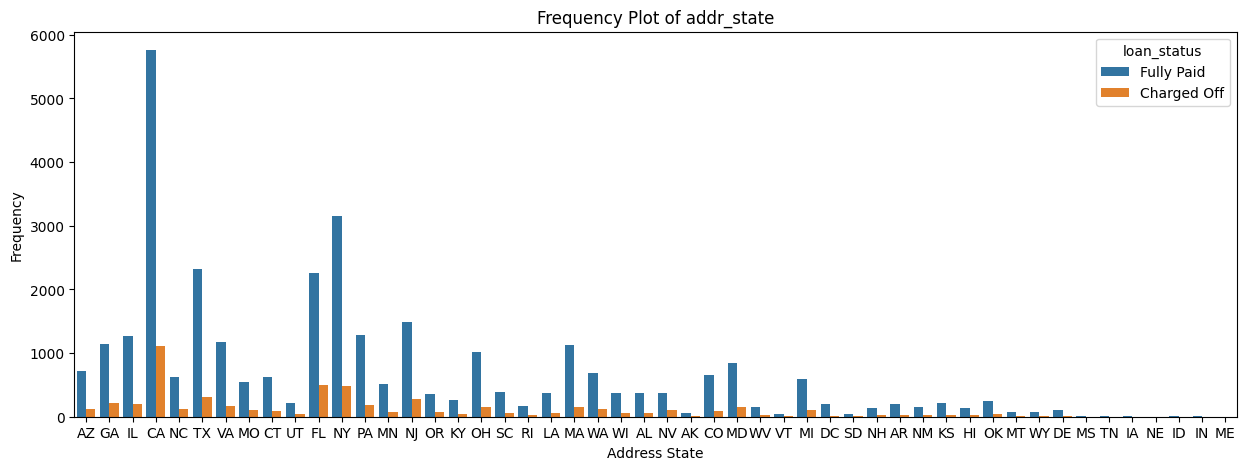

In [33]:
# For Unordered Categorical Variable 'addr_state'
print("Value counts for charged off")
print(loan[loan['loan_status'] == "Charged Off"]['addr_state'].value_counts())
plt.figure(figsize=(15,5))
plt.title('Frequency Plot of addr_state')
sns.countplot(x = 'addr_state', data=loan, hue='loan_status')
plt.xlabel('Address State')
plt.ylabel('Frequency')
plt.show()

#####  Inference:
- California (CA), Florida (FL) and New York (NY) have highest rate of defaulters.
- addr-state may not be a major contributor for defauters but it can add value while taking optimal decisions.

### Exploring Ordered Categorical Variables
    - term
    - grade
    - sub_grade
    - emp_length
    - issue_year
    - issue_month

 36 months    28771
 60 months     9370
Name: term, dtype: int64

Value counts for charged off
 36 months    3188
 60 months    2380
Name: term, dtype: int64


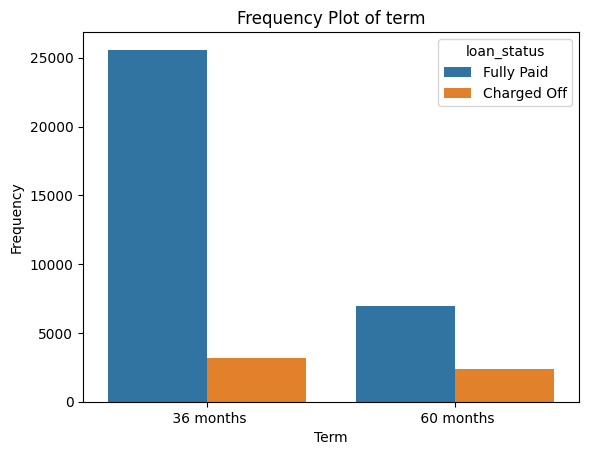

In [34]:
# For Ordered Categorical Variable 'term'
print(loan['term'].value_counts())
print("\nValue counts for charged off")
print(loan[loan['loan_status'] == "Charged Off"]['term'].value_counts())

plt.title('Frequency Plot of term')
sns.countplot(x = 'term', data=loan, hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.show()

##### Inference:
- Borrowers with Charged Off loans are more likely to have chosen a 36-month loan term over 60 months from Univariate Analysis.

B    11578
A     9977
C     7739
D     5013
E     2599
F      948
G      287
Name: grade, dtype: int64

Value counts for charged off
B    1414
C    1338
D    1109
E     700
A     601
F     309
G      97
Name: grade, dtype: int64


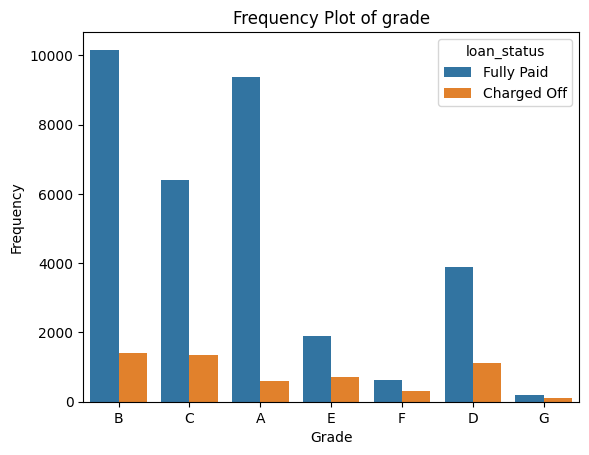

In [35]:
# For Ordered Categorical Variable 'grade'
print(loan['grade'].value_counts())
print("\nValue counts for charged off")
print(loan[loan['loan_status'] == "Charged Off"]['grade'].value_counts())

plt.title('Frequency Plot of grade')
sns.countplot(x = 'grade', data=loan, hue='loan_status')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

##### Inference:
- Borrowers with Charged Off loans are more likely to have received loan grades of B, C (or) D based on Univariate Analysis.

Value counts for charged off
B5    356
B3    335
C1    333
B4    328
C2    318
C3    269
D2    268
D3    252
B2    225
A5    216
D4    214
C4    211
D5    209
C5    207
E1    195
A4    178
B1    170
D1    166
E2    157
E4    126
E3    117
E5    105
A3    103
F1     88
A2     74
F2     67
F5     53
F4     51
F3     50
G1     30
A1     30
G2     26
G3     19
G4     12
G5     10
Name: sub_grade, dtype: int64


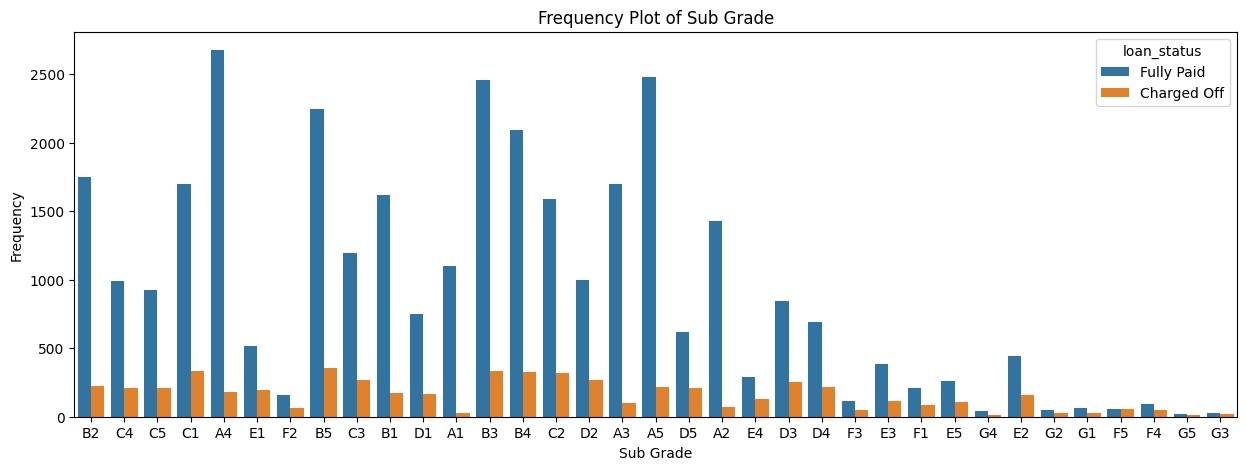

In [36]:
# For Ordered Categorical Variable 'sub_grade'
print("Value counts for charged off")
print(loan[loan['loan_status'] == "Charged Off"]['sub_grade'].value_counts())

plt.figure(figsize=(15,5))
plt.title('Frequency Plot of Sub Grade')
sns.countplot(x = 'sub_grade', data=loan, hue='loan_status')
plt.xlabel('Sub Grade')
plt.ylabel('Frequency')
plt.show()

##### Inference: 
- Borrowers with Charged Off loans are more likely to have sub-grades B3, B4, B5 (within Grade B), C1, C2, C3 (within Grade C), and D2, D3 (within Grade D) from Univariate analysis

Value counts for charged off
10+ years    1541
0 year        631
2 years       560
3 years       551
5 years       455
4 years       454
1 year        452
6 years       303
7 years       262
8 years       202
9 years       157
Name: emp_length, dtype: int64
loan_status  emp_length
Charged Off  0 year         631
             1 year         452
             10+ years     1541
             2 years        560
             3 years        551
             4 years        454
             5 years        455
             6 years        303
             7 years        262
             8 years        202
             9 years        157
Fully Paid   0 year        3834
             1 year        2686
             10+ years     7837
             2 years       3680
             3 years       3422
             4 years       2856
             5 years       2708
             6 years       1845
             7 years       1432
             8 years       1215
             9 years       1058
Name: emp_leng

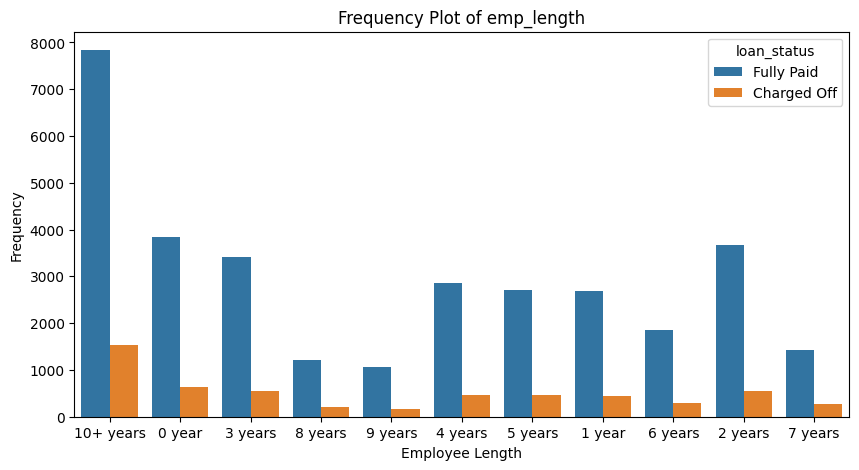

In [37]:
# For Ordered Categorical Variable 'emp_length'
loan.emp_length.replace('< 1 year', '0 year', inplace = True)
print("Value counts for charged off")
print(loan[loan['loan_status'] == "Charged Off"]['emp_length'].value_counts())
print(loan.groupby(by = 'loan_status').emp_length.value_counts().sort_index())
plt.figure(figsize=(10,5))
plt.title('Frequency Plot of emp_length')
sns.countplot(x = 'emp_length', data=loan, hue='loan_status')
plt.xlabel('Employee Length')
plt.ylabel('Frequency')
plt.show()

##### Inference: 
- Borrowers with Charged Off loans are more likely to fall into two employment length categories: very long tenure (10+ years) or very short tenure (less than a year) from Univariate Analysis.

Value counts for charged off
2011    3235
2010    1461
2009     587
2008     242
2007      43
Name: issue_year, dtype: int64


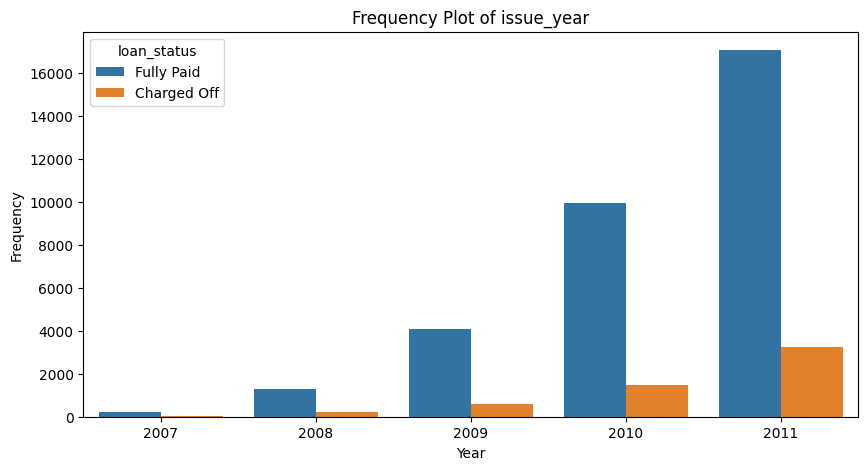

In [38]:
# For Ordered Categorical Variable 'issue_year'
print("Value counts for charged off")
print(loan[loan['loan_status'] == "Charged Off"]['issue_year'].value_counts())

plt.figure(figsize=(10,5))
plt.title('Frequency Plot of issue_year')
sns.countplot(x = 'issue_year', data=loan, hue='loan_status')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

##### Inference:
- Charged Off seemed to super hike in 2011 which may have multiple reasons like economic crisis/recession.

Value counts for charged off
Dec    673
Nov    592
Oct    571
Sep    544
Jun    476
Jul    474
Aug    463
May    462
Apr    367
Mar    341
Jan    317
Feb    288
Name: issue_month, dtype: int64


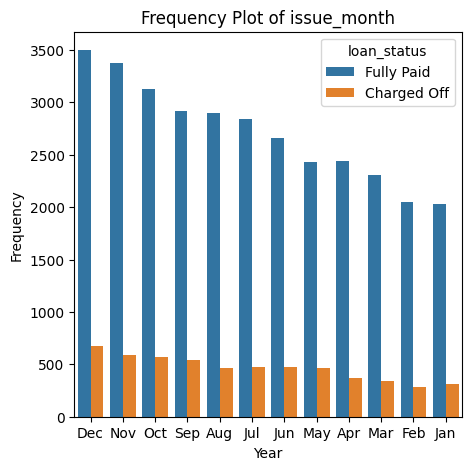

In [39]:
# For Ordered Categorical Variable 'issue_month'
print("Value counts for charged off")
print(loan[loan['loan_status'] == "Charged Off"]['issue_month'].value_counts())

plt.figure(figsize=(5,5))
plt.title('Frequency Plot of issue_month')
sns.countplot(x = 'issue_month', data=loan, hue='loan_status')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

##### Inference: 
- Borrowers with Charged Off loans are more likely to have received their loans in 3rd quarter of the year based on Univariate Analysis.

###      Exploring Quantitative Variables
    - funded_amnt
    - int_rate_percent
    - installment
    - annual_inc
    - dti

count    38141.000000
mean     10711.369655
std       7010.966720
min        500.000000
25%       5100.000000
50%       9500.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

Statistics for Charged Off for funded_amnt
count     5568.000000
mean     11714.282507
std       7719.797879
min        900.000000
25%       5550.000000
50%      10000.000000
75%      16000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


Text(0, 0.5, 'Distribution')

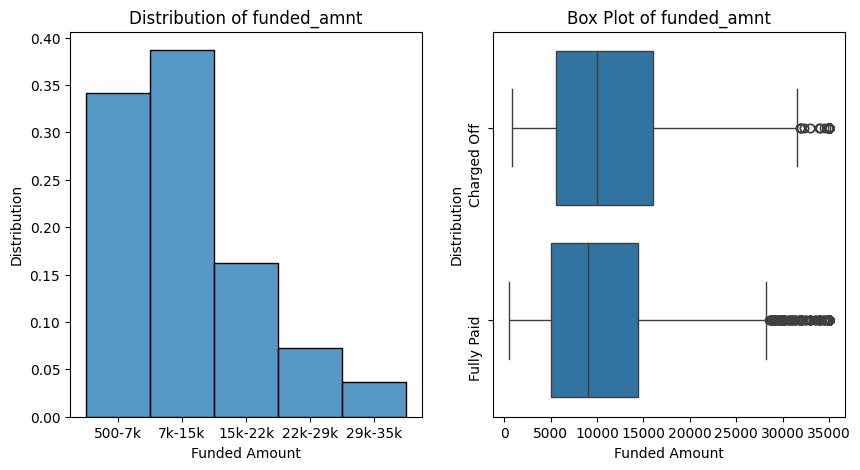

In [40]:
# For Quantitative variable 'funded_amnt'

print(loan.funded_amnt.describe())
print("\nStatistics for Charged Off for funded_amnt")
print(loan[loan['loan_status'] == "Charged Off"]['funded_amnt'].describe())

loan_status_order = ['Charged Off', 'Fully Paid']
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  
sns.histplot(loan[loan['loan_status']=='Charged Off']['funded_amnt_range'],stat='density')
plt.title("Distribution of funded_amnt") 
plt.xlabel('Funded Amount')
plt.ylabel('Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x = 'funded_amnt', data = loan, y='loan_status', order=loan_status_order)
plt.title("Box Plot of funded_amnt")
plt.tick_params(axis='y', rotation=90)
plt.xlabel('Funded Amount')
plt.ylabel('Distribution')

##### Inference: 
- The difference between the mean of 10703.71 and median of 9,500.00 of loan amounts suggests a right skew in the data, making the median a more suitable measure of central tendency.  For Charged-off applicants in the analysis have a median funded amount of 10,000, with the middle 50% of applicants ranging between 5,500 and 16,000.

count    38141.000000
mean        11.913285
std          3.682916
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate_percent, dtype: float64

Statistics for Charged Off for int_rate_percent
count    5568.000000
mean       13.801422
std         3.648190
min         5.420000
25%        11.280000
50%        13.570000
75%        16.400000
max        24.400000
Name: int_rate_percent, dtype: float64


Text(0, 0.5, 'Distribution')

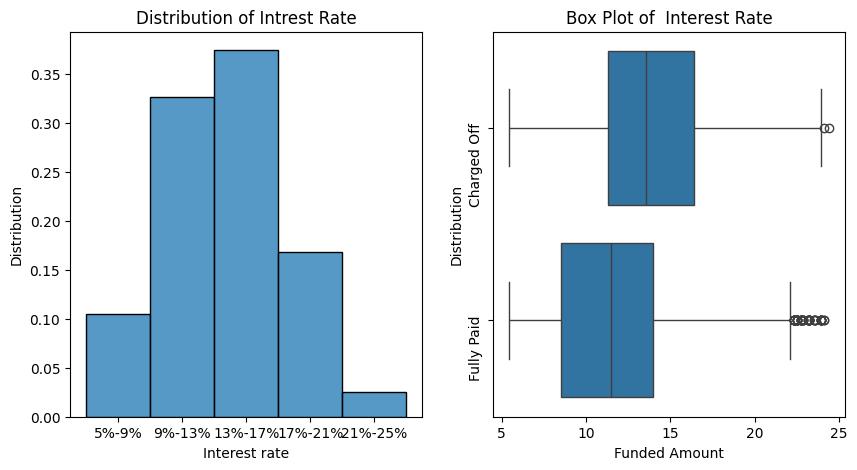

In [41]:
# For Quantitative variable 'int_rate_percent'
print(loan.int_rate_percent.describe())
print("\nStatistics for Charged Off for int_rate_percent")
print(loan[loan['loan_status'] == "Charged Off"]['int_rate_percent'].describe())
loan_status_order = ['Charged Off', 'Fully Paid']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  
sns.histplot(loan[loan['loan_status']=='Charged Off']['int_rate_percent_range'],stat='density')
plt.title("Distribution of Intrest Rate") 
plt.xlabel('Interest rate')
plt.ylabel('Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x = 'int_rate_percent', data = loan, y='loan_status', order=loan_status_order)
plt.title("Box Plot of  Interest Rate")
plt.tick_params(axis='y', rotation=90)
plt.xlabel('Funded Amount')
plt.ylabel('Distribution')

##### Inference: 
- For charged-off applicants, interest rates show a central tendency of 13.57%. The analysis also indicates that at least 25% of applicants had interest rates below 11.28%  and at least 75% had rates not exceeding 16.40% .

count    38141.000000
mean       320.152320
std        205.955885
min         15.690000
25%        165.410000
50%        276.640000
75%        421.890000
max       1305.190000
Name: installment, dtype: float64

Statistics for Charged Off for installment
count    5568.000000
mean      334.744948
std       215.340805
min        22.790000
25%       168.470000
50%       293.110000
75%       455.730000
max      1305.190000
Name: installment, dtype: float64


Text(0, 0.5, 'Distribution')

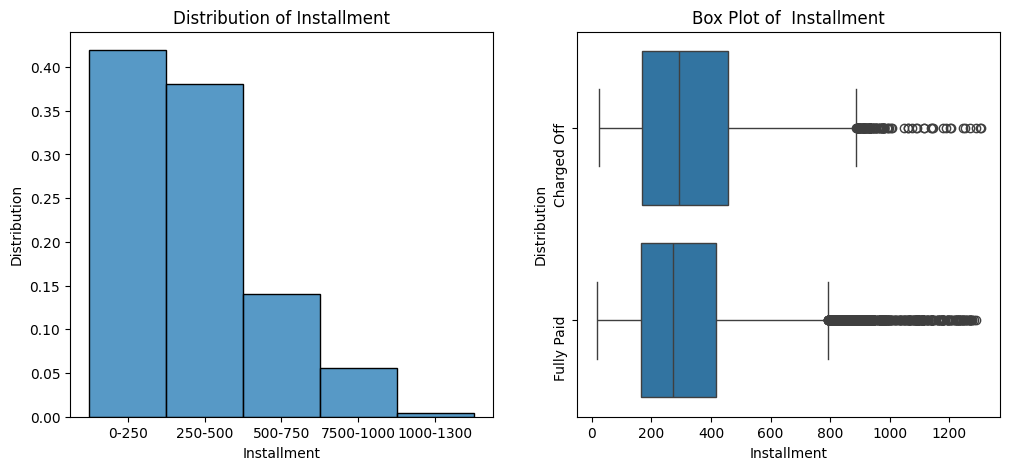

In [42]:
# For Quantitative variable 'installment'

print(loan.installment.describe())
print("\nStatistics for Charged Off for installment")
print(loan[loan['loan_status'] == "Charged Off"]['installment'].describe())
loan_status_order = ['Charged Off', 'Fully Paid']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  
sns.histplot(loan[loan['loan_status']=='Charged Off']['installment_range'],stat='density')
plt.title("Distribution of Installment") 
plt.xlabel('Installment')
plt.ylabel('Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x = 'installment', data = loan, y='loan_status', order=loan_status_order)
plt.title("Box Plot of  Installment")
plt.tick_params(axis='y', rotation=90)
plt.xlabel('Installment')
plt.ylabel('Distribution')

##### Inference: 
- For charged-off applicants, installment show a central tendency of  292.04 . The analysis also indicates that at least 25% of applicants had installments below 168.45  and at least 75% had installments not exceeding 454.38.

count    38141.000000
mean       320.152320
std        205.955885
min         15.690000
25%        165.410000
50%        276.640000
75%        421.890000
max       1305.190000
Name: installment, dtype: float64

Statistics for Charged Off for installment
count      5568.000000
mean      59919.076184
std       32836.457495
min        4080.000000
25%       37000.000000
50%       53000.000000
75%       75000.000000
max      230000.000000
Name: annual_inc, dtype: float64


Text(0, 0.5, 'Distribution')

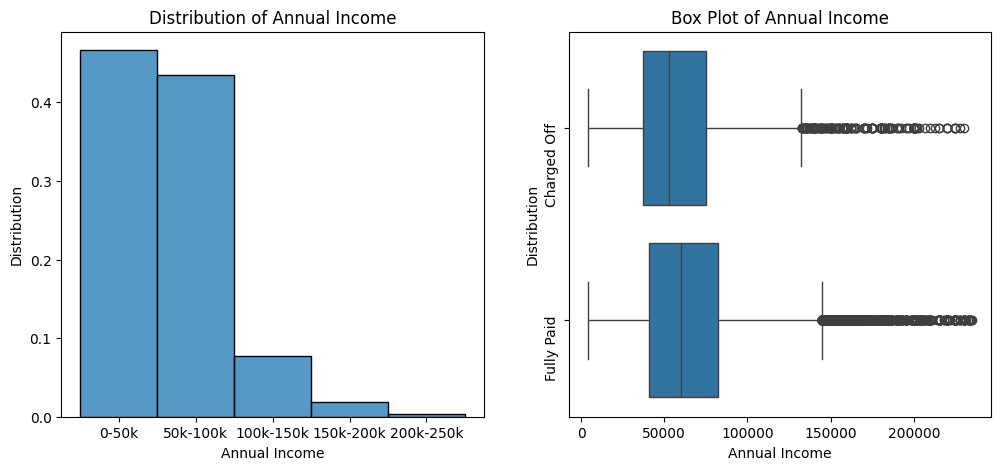

In [43]:
# For Quantitative variable 'annual_inc'

print(loan.installment.describe())
print("\nStatistics for Charged Off for installment")
print(loan[loan['loan_status'] == "Charged Off"]['annual_inc'].describe())
loan_status_order = ['Charged Off', 'Fully Paid']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  
sns.histplot(loan[loan['loan_status']=='Charged Off']['annual_inc_range'],stat='density')
plt.title("Distribution of Annual Income") 
plt.xlabel('Annual Income')
plt.ylabel('Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x = 'annual_inc', data = loan, y='loan_status', order=loan_status_order)
plt.title("Box Plot of Annual Income")
plt.tick_params(axis='y', rotation=90)
plt.xlabel('Annual Income')
plt.ylabel('Distribution')

##### Inference: 
- For charged-off applicants, Annual Income show a central tendency of  52,800 . The analysis also indicates that at least 25% of applicants had Annual Income below 37,000 and at least 75% had income not exceeding 74,879. 

count    38141.000000
mean        13.337035
std          6.656324
min          0.000000
25%          8.220000
50%         13.440000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

Statistics for Charged Off for dti
count    5568.000000
mean       14.049386
std         6.569409
min         0.000000
25%         9.130000
50%        14.350000
75%        19.312500
max        29.850000
Name: dti, dtype: float64


Text(0, 0.5, 'Distribution')

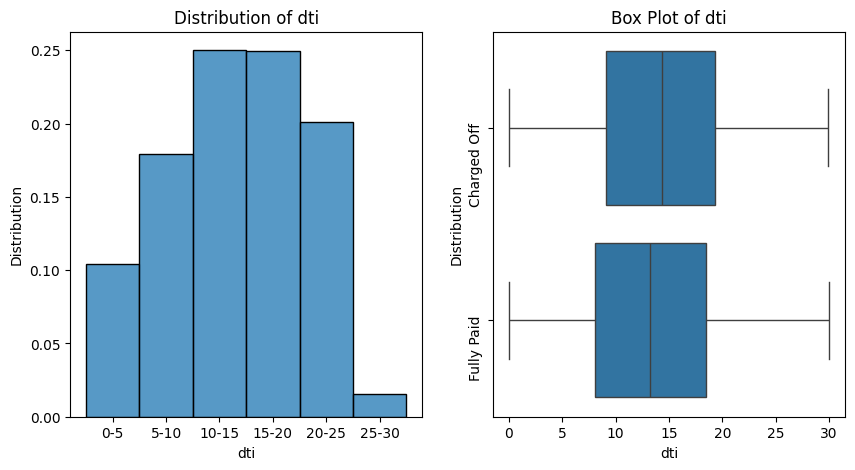

In [44]:
# For Quantitative variable 'dti'

print(loan.dti.describe())
print("\nStatistics for Charged Off for dti")
print(loan[loan['loan_status'] == "Charged Off"]['dti'].describe())
loan_status_order = ['Charged Off', 'Fully Paid']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  
sns.histplot(loan[loan['loan_status']=='Charged Off']['dti_range'],stat='density')
plt.title("Distribution of dti") 
plt.xlabel('dti')
plt.ylabel('Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x = 'dti', data = loan, y='loan_status', order=loan_status_order)
plt.title("Box Plot of dti")
plt.tick_params(axis='y', rotation=90)
plt.xlabel('dti')
plt.ylabel('Distribution')

#####  Inference: 
- For charged-off applicants, dti show a central tendency of  14.34 . The analysis also indicates that at least 25% of applicants had dti below 9.13 and at least 75% had rates not exceeding 19.31.   

## Bivariate Analysis

###  Exploring Categorical Variables
    - home_ownership
    - purpose
    - addr_state
    - term
    - grade
    - sub_grade
    - emp_length
    - issue_yr
    - funded_amnt
    - int_rate_percent
    - annual_inc
    - installment
    - dti

In [45]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate_percent', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util_percent',
       'total_acc', 'pub_rec_bankruptcies', 'issue_month', 'issue_year',
       'funded_amnt_range', 'dti_range', 'installment_range',
       'annual_inc_range', 'int_rate_percent_range'],
      dtype='object')

loan_status     Charged Off  Fully Paid  total  charged_off_ratio
home_ownership                                                   
OTHER                    18          76     94              19.15
RENT                   2814       15551  18365              15.32
OWN                     438        2504   2942              14.89
MORTGAGE               2298       14442  16740              13.73


<Axes: xlabel='home_ownership', ylabel='charged_off_ratio'>

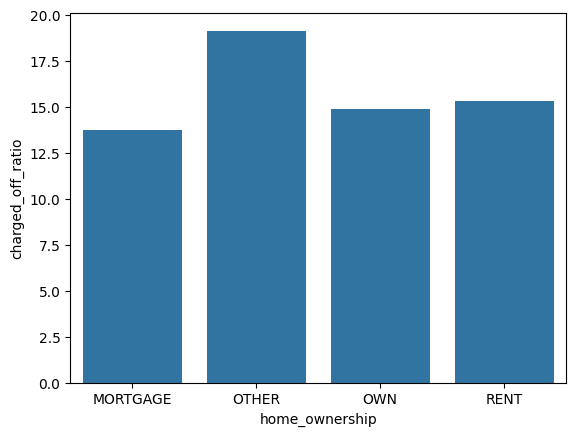

In [46]:
# Categorical Variable Analysis: home_ownership against Charged Off Rate

data = loan.pivot_table(values = 'funded_amnt',index = 'home_ownership',columns = 'loan_status',aggfunc=len)
data['total'] = data['Charged Off'] + data['Fully Paid']
data['charged_off_ratio'] = round(data['Charged Off'] / data['total'] * 100,2)
print(data.sort_values(by='charged_off_ratio', ascending=False))
sns.barplot(x ='home_ownership', y = 'charged_off_ratio', data = data)

##### Inference: Top 3 Charged Off Rates by Home Ownership

   * OTHER = 18.75
   * RENT  = 15.35
   * OWN   = 14.93

loan_status         Charged Off  Fully Paid  total  charged_off_ratio
purpose                                                              
small_business              472        1250   1722              27.41
renewable_energy             19          81    100              19.00
educational                  55         265    320              17.19
other                       625        3192   3817              16.37
house                        58         299    357              16.25
moving                       91         477    568              16.02
medical                     105         567    672              15.62
debt_consolidation         2747       15157  17904              15.34
vacation                     53         321    374              14.17
home_improvement            335        2457   2792              12.00
credit_card                 536        4449   4985              10.75
car                         159        1331   1490              10.67
major_purchase      

<Axes: xlabel='purpose', ylabel='charged_off_ratio'>

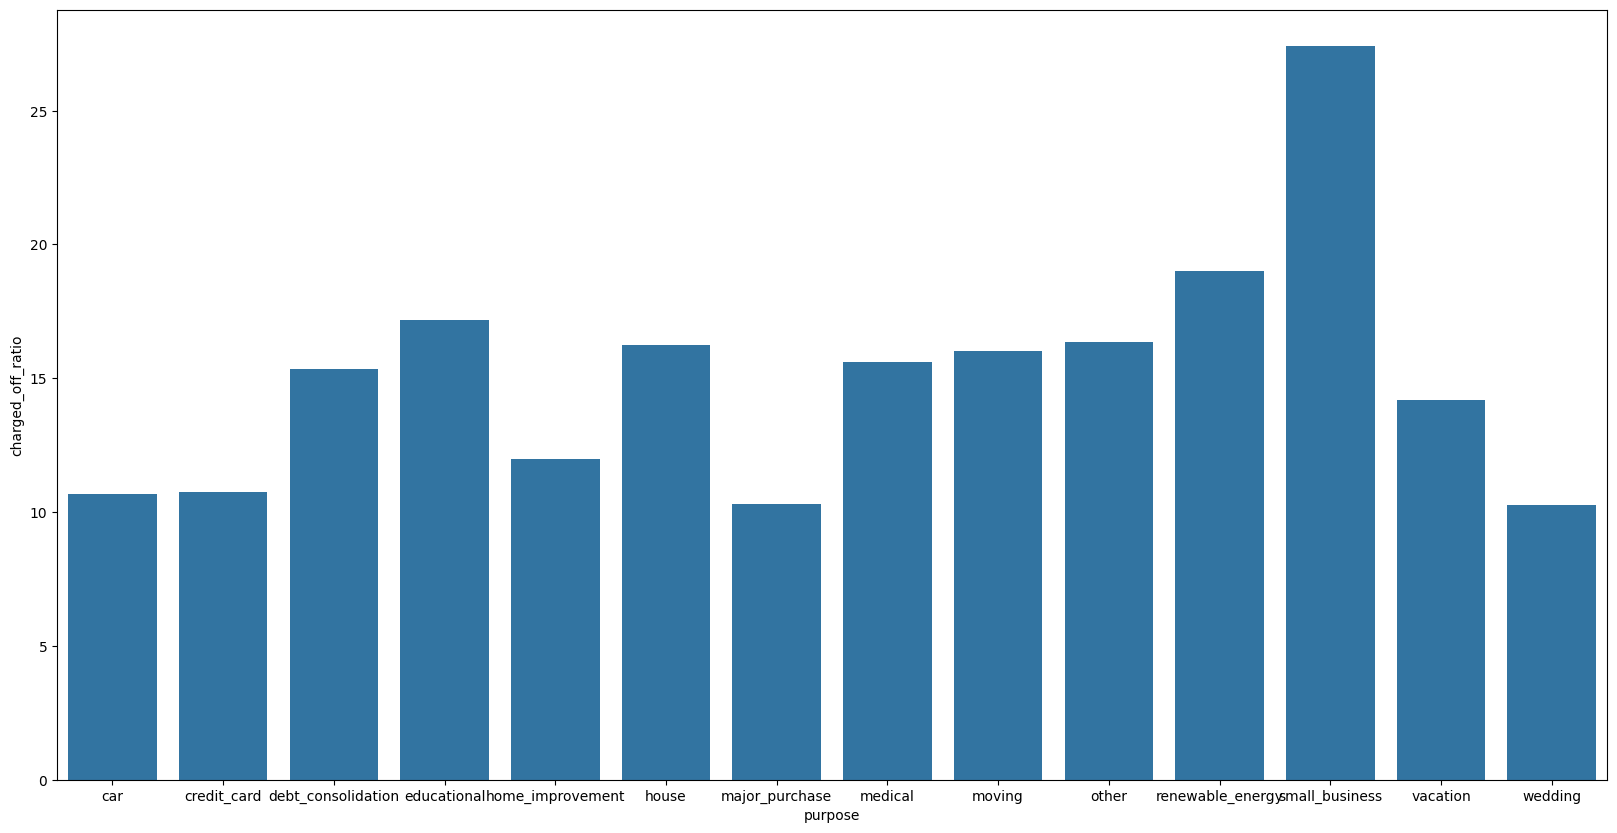

In [47]:
# Categorical Variable Analysis: purpose against Charged Off Rate

data = loan.pivot_table(values = 'funded_amnt',index = 'purpose',columns = 'loan_status',aggfunc=len)
data['total'] = data['Charged Off'] + data['Fully Paid']
data['charged_off_ratio'] = round(data['Charged Off'] / data['total'] * 100,2)
print(data.sort_values(by='charged_off_ratio', ascending=False))
plt.figure(figsize=(20, 10))
sns.barplot(x ='purpose', y = 'charged_off_ratio', data = data)

##### Inference: Top 3 Charged Off Rates by Purpose

   * small_business    = 27.39
   * renewable_energy  = 19.00
   * educational       = 17.03

loan_status  Charged Off  Fully Paid   total  charged_off_ratio
addr_state                                                     
NE                   3.0         2.0     5.0              60.00
NV                 107.0       367.0   474.0              22.57
SD                  12.0        49.0    61.0              19.67
AK                  14.0        63.0    77.0              18.18
FL                 496.0      2252.0  2748.0              18.05
MO                 113.0       551.0   664.0              17.02
HI                  28.0       137.0   165.0              16.97
NM                  30.0       149.0   179.0              16.76
ID                   1.0         5.0     6.0              16.67
CA                1115.0      5760.0  6875.0              16.22
OR                  70.0       364.0   434.0              16.13
UT                  40.0       211.0   251.0              15.94
GA                 215.0      1135.0  1350.0              15.93
MD                 160.0       848.0  10

<Axes: xlabel='addr_state', ylabel='charged_off_ratio'>

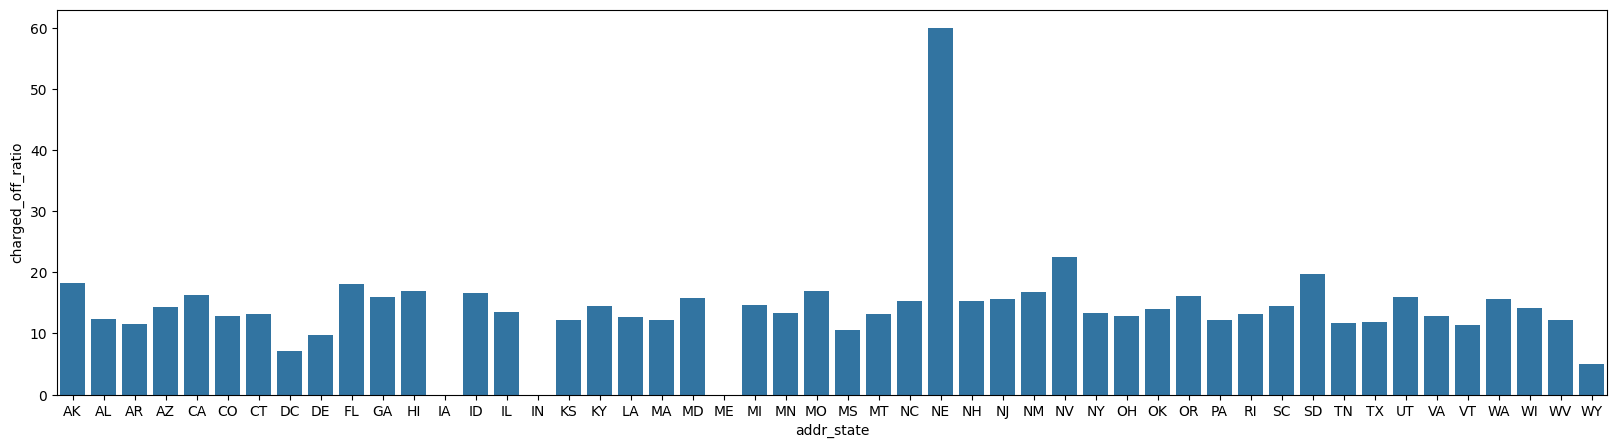

In [48]:
# Categorical Variable Analysis: addr_state against Charged Off Rate

data = loan.pivot_table(values = 'funded_amnt',index = 'addr_state',columns = 'loan_status',aggfunc=len)
data['total'] = data['Charged Off'] + data['Fully Paid']
data['charged_off_ratio'] = round(data['Charged Off'] / data['total'] * 100,2)
print(data.sort_values(by='charged_off_ratio', ascending=False))
plt.figure(figsize=(20, 5))
sns.barplot(x ='addr_state', y = 'charged_off_ratio', data = data)

##### Inference: Top 5 Charged Off Rates by Address State

   * NE (Nebraska)     = 60.00 (Because it has toatal 5 loans out off them 3 are charged off)
   * NV (Nevada)       = 22.53
   * SD (South Dakota) = 19.35
   * AK (Alaska)       = 18.18
   * FL (Florida)      = 18.08
   

loan_status  Charged Off  Fully Paid  total  charged_off_ratio
term                                                          
 60 months          2380        6990   9370              25.40
 36 months          3188       25583  28771              11.08


<Axes: xlabel='term', ylabel='charged_off_ratio'>

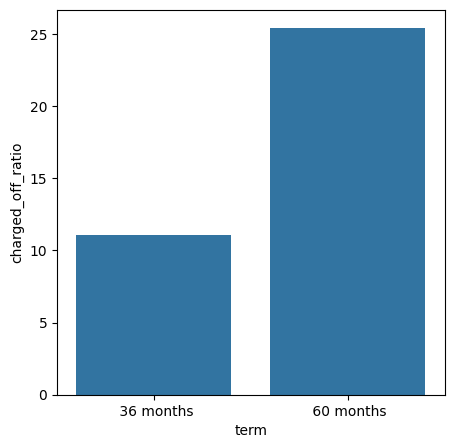

In [49]:
# Categorical Variable Analysis: term against Charged Off Rate

data = loan.pivot_table(values = 'funded_amnt',index = 'term',columns = 'loan_status',aggfunc=len)
data['total'] = data['Charged Off'] + data['Fully Paid']
data['charged_off_ratio'] = round(data['Charged Off'] / data['total'] * 100,2)
print(data.sort_values(by='charged_off_ratio', ascending=False))
plt.figure(figsize=(5, 5))
sns.barplot(x ='term', y = 'charged_off_ratio', data = data)

##### Inference:
- People who took loan for larger term/tenure have higher Charged offs like 60 months(charged off rate 22.70)

loan_status  Charged Off  Fully Paid  total  charged_off_ratio
grade                                                         
G                     97         190    287              33.80
F                    309         639    948              32.59
E                    700        1899   2599              26.93
D                   1109        3904   5013              22.12
C                   1338        6401   7739              17.29
B                   1414       10164  11578              12.21
A                    601        9376   9977               6.02


<Axes: xlabel='grade', ylabel='charged_off_ratio'>

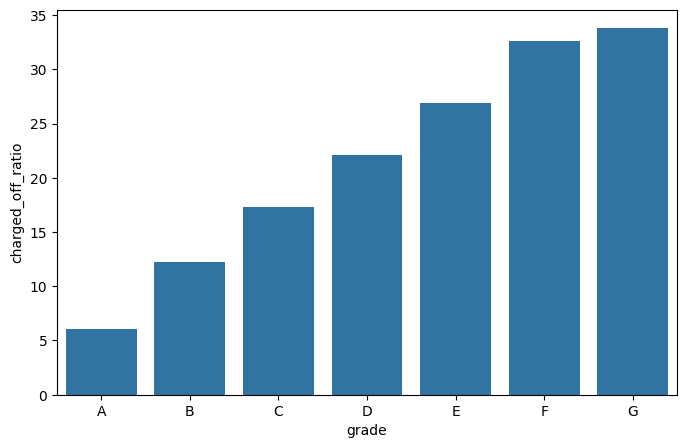

In [50]:
# Categorical Variable Analysis: grade against Charged Off Rate

data = loan.pivot_table(values = 'funded_amnt',index = 'grade',columns = 'loan_status',aggfunc=len)
data['total'] = data['Charged Off'] + data['Fully Paid']
data['charged_off_ratio'] = round(data['Charged Off'] / data['total'] * 100,2)
print(data.sort_values(by='charged_off_ratio', ascending=False))
plt.figure(figsize=(8, 5))
sns.barplot(x ='grade', y = 'charged_off_ratio', data = data)

##### Inference:
- Grade can be assigned based on credit/repayment/collateral history.
- Highest grade being A and ranging so on.
- Grade can also play a crucial role in defaulting process because lower the grade higher the risk of defaulting in future

loan_status      Charged Off  Fully Paid  total  charged_off_ratio
grade sub_grade                                                   
G     G5                  10          18     28              35.71
      G4                  12          39     51              23.53
      G3                  19          25     44              43.18
      G2                  26          47     73              35.62
      G1                  30          61     91              32.97
F     F5                  53          55    108              49.07
      F4                  51          94    145              35.17
      F3                  50         118    168              29.76
      F2                  67         162    229              29.26
      F1                  88         210    298              29.53
E     E5                 105         260    365              28.77
      E4                 126         293    419              30.07
      E3                 117         385    502              2

<Axes: xlabel='sub_grade', ylabel='charged_off_ratio'>

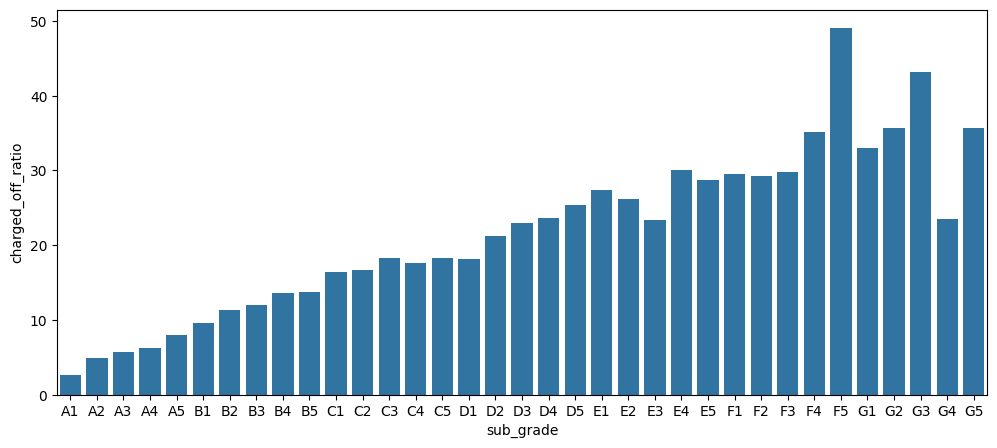

In [51]:
# Categorical Variable Analysis: sub_grade against Charged Off Rate

data = loan.pivot_table(values = 'funded_amnt',index = ['grade','sub_grade'],columns = 'loan_status',aggfunc=len)
data['total'] = data['Charged Off'] + data['Fully Paid']
data['charged_off_ratio'] = round(data['Charged Off'] / data['total'] * 100,2)
print(data.sort_values(by = ['grade', 'sub_grade', 'charged_off_ratio'], ascending=False))
plt.figure(figsize=(12, 5))
sns.barplot(x ='sub_grade', y = 'charged_off_ratio', data = data)

##### Inference:
- Sub-Grade can be assigned based on credit/repayment/collateral history which is category of grades
- Highest sub-grade being A1, A2, A3, B1 and ranging so on.
- Sub-Grade can also play a crucial role in defaulting process because lower the sub-grade higher the risk of defaulting in future

loan_status  Charged Off  Fully Paid  total  charged_off_ratio
emp_length                                                    
10+ years           1541        7837   9378              16.43
7 years              262        1432   1694              15.47
1 year               452        2686   3138              14.40
5 years              455        2708   3163              14.39
8 years              202        1215   1417              14.26
0 year               631        3834   4465              14.13
6 years              303        1845   2148              14.11
3 years              551        3422   3973              13.87
4 years              454        2856   3310              13.72
2 years              560        3680   4240              13.21
9 years              157        1058   1215              12.92


<Axes: xlabel='emp_length', ylabel='charged_off_ratio'>

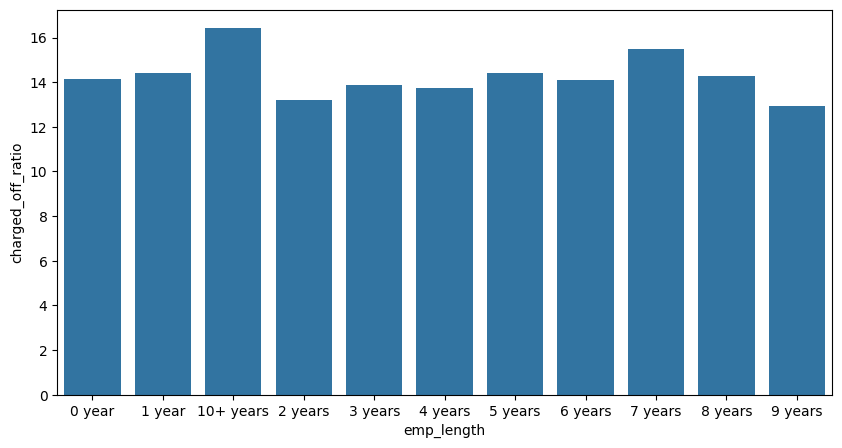

In [52]:
# Categorical Variable Analysis: emp_length against Charged Off Rate

data = loan.pivot_table(values = 'funded_amnt',index = 'emp_length',columns = 'loan_status',aggfunc=len)
data['total'] = data['Charged Off'] + data['Fully Paid']
data['charged_off_ratio'] = round(data['Charged Off'] / data['total'] * 100,2)
print(data.sort_values(by='charged_off_ratio', ascending=False))
plt.figure(figsize=(10, 5))
sns.barplot(x ='emp_length', y = 'charged_off_ratio', data = data)

##### Inference: 
- Majorly more the emp_length higher the ratio of getting charged off. Here are the top 3 => 10+ years, 7 years, 1 Years 

loan_status  Charged Off  Fully Paid  total  charged_off_ratio
issue_year                                                    
2007                  43         202    245              17.55
2011                3235       17074  20309              15.93
2008                 242        1301   1543              15.68
2010                1461        9933  11394              12.82
2009                 587        4063   4650              12.62


<Axes: xlabel='issue_year', ylabel='charged_off_ratio'>

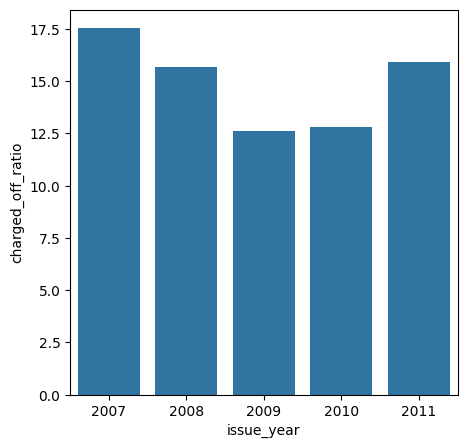

In [53]:
# Categorical Variable Analysis: issue_year against Charged Off Rate

data = loan.pivot_table(values = 'funded_amnt',index = 'issue_year',columns = 'loan_status',aggfunc=len)
data['total'] = data['Charged Off'] + data['Fully Paid']
data['charged_off_ratio'] = round(data['Charged Off'] / data['total'] * 100,2)
print(data.sort_values(by='charged_off_ratio', ascending=False))
plt.figure(figsize=(5, 5))
sns.barplot(x ='issue_year', y = 'charged_off_ratio', data = data)

##### Inference: 
- Examining the plots, we observe that the charged-off ratio decreased from 2007 to 2009, then gradually increased from 2009 to 2011. This does not significantly affect the overall charged-off rate.

loan_status  Charged Off  Fully Paid  total  charged_off_ratio
issue_month                                                   
Dec                  673        3499   4172              16.13
May                  462        2426   2888              16.00
Sep                  544        2918   3462              15.71
Oct                  571        3132   3703              15.42
Jun                  476        2662   3138              15.17
Nov                  592        3373   3965              14.93
Jul                  474        2841   3315              14.30
Aug                  463        2894   3357              13.79
Jan                  317        2031   2348              13.50
Apr                  367        2440   2807              13.07
Mar                  341        2310   2651              12.86
Feb                  288        2047   2335              12.33


<Axes: xlabel='issue_month', ylabel='charged_off_ratio'>

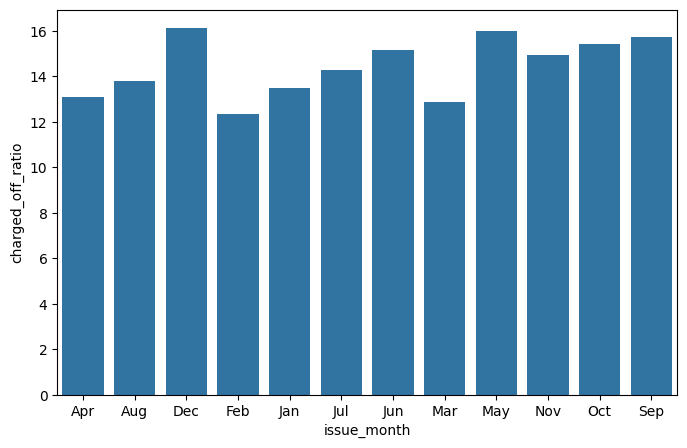

In [54]:
# Categorical Variable Analysis: issue_month against Charged Off Rate

data = loan.pivot_table(values = 'funded_amnt',index = 'issue_month',columns = 'loan_status',aggfunc=len)
data['total'] = data['Charged Off'] + data['Fully Paid']
data['charged_off_ratio'] = round(data['Charged Off'] / data['total'] * 100,2)
print(data.sort_values(by='charged_off_ratio', ascending=False))
plt.figure(figsize=(8, 5))
sns.barplot(x ='issue_month', y = 'charged_off_ratio', data = data)

##### Inference: 
- From above we can observe there is high charged off ratio in Dec, May, Sept

loan_status        Charged Off  Fully Paid  total  charged_off_ratio
funded_amnt_range                                                   
29k-35k                    205         675    880              23.30
22k-29k                    403        1732   2135              18.88
15k-22k                    902        4009   4911              18.37
7k-15k                    2154       13631  15785              13.65
500-7k                    1904       12521  14425              13.20


<Axes: xlabel='funded_amnt_range', ylabel='charged_off_ratio'>

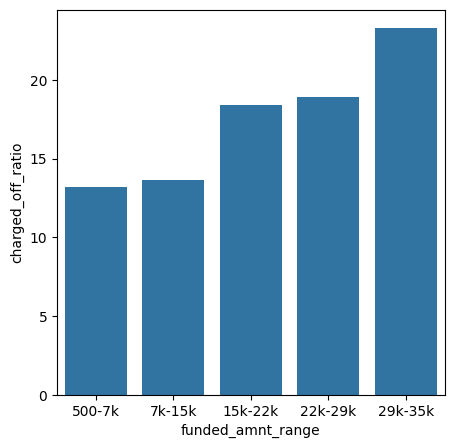

In [55]:
# Categorical Variable Analysis: funded_amnt against Charged Off Rate

data = loan.pivot_table(values = 'funded_amnt',index = 'funded_amnt_range',columns = 'loan_status',aggfunc=len)
data['total'] = data['Charged Off'] + data['Fully Paid']
data['charged_off_ratio'] = round(data['Charged Off'] / data['total'] * 100,2)
print(data.sort_values(by='charged_off_ratio', ascending=False))
plt.figure(figsize=(5, 5))
sns.barplot(x ='funded_amnt_range', y = 'charged_off_ratio', data = data)

##### Inference:
- As the Funded Amount increases, the Charge Off Rate also Increases

loan_status             Charged Off  Fully Paid  total  charged_off_ratio
int_rate_percent_range                                                   
21%-25%                         143         181    324              44.14
17%-21%                         936        2209   3145              29.76
13%-17%                        2086        8783  10869              19.19
9%-13%                         1820       12243  14063              12.94
5%-9%                           583        9157   9740               5.99


<Axes: xlabel='int_rate_percent_range', ylabel='charged_off_ratio'>

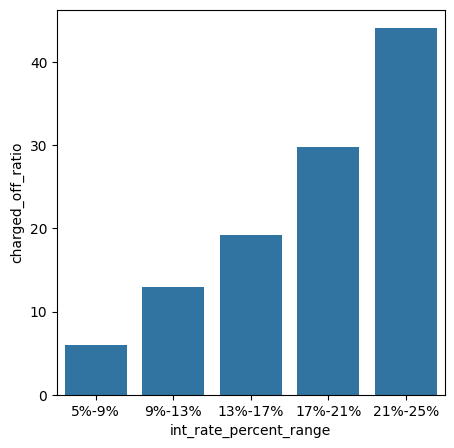

In [56]:
# Categorical Variable Analysis: int_rate_percent against Charged Off Rate

data = loan.pivot_table(values = 'funded_amnt',index = 'int_rate_percent_range',columns = 'loan_status',aggfunc=len)
data['total'] = data['Charged Off'] + data['Fully Paid']
data['charged_off_ratio'] = round(data['Charged Off'] / data['total'] * 100,2)
print(data.sort_values(by='charged_off_ratio', ascending=False))
plt.figure(figsize=(5, 5))
sns.barplot(x ='int_rate_percent_range', y = 'charged_off_ratio', data = data)

#####  Inference:
- Loans with highest interest rates are going to be defaulted more.

loan_status       Charged Off  Fully Paid  total  charged_off_ratio
annual_inc_range                                                   
0-50k                    2598       12748  15346              16.93
50k-100k                 2421       15280  17701              13.68
150k-200k                 103         813    916              11.24
100k-150k                 429        3563   3992              10.75
200k-250k                  17         169    186               9.14


<Axes: xlabel='annual_inc_range', ylabel='charged_off_ratio'>

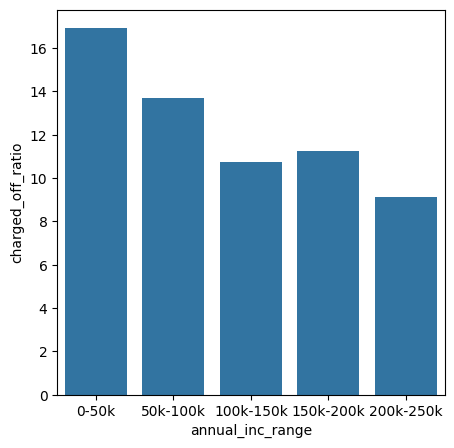

In [57]:
# Categorical Variable Analysis: annual_inc against Charged Off Rate

data = loan.pivot_table(values = 'funded_amnt',index = 'annual_inc_range',columns = 'loan_status',aggfunc=len)
data['total'] = data['Charged Off'] + data['Fully Paid']
data['charged_off_ratio'] = round(data['Charged Off'] / data['total'] * 100,2)
print(data.sort_values(by='charged_off_ratio', ascending=False))
plt.figure(figsize=(5, 5))
sns.barplot(x ='annual_inc_range', y = 'charged_off_ratio', data = data)

##### Inference:
- Income of loan applicant plays a vital role in loan repayment which makes it as driving factor for analysis
- Higher the income less likely to get defaulted.


loan_status        Charged Off  Fully Paid  total  charged_off_ratio
installment_range                                                   
7500-1000                  312        1349   1661              18.78
500-750                    779        3948   4727              16.48
250-500                   2119       12373  14492              14.62
0-250                     2335       14718  17053              13.69
1000-1300                   23         185    208              11.06


<Axes: xlabel='installment_range', ylabel='charged_off_ratio'>

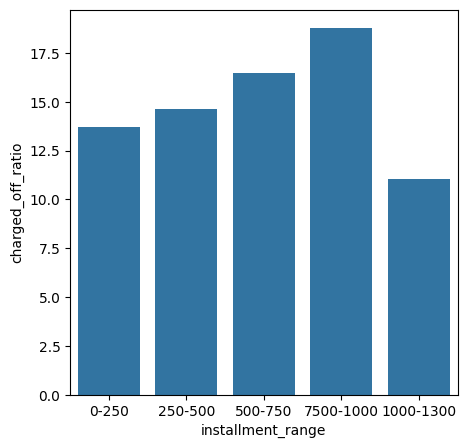

In [58]:
# Categorical Variable Analysis: installment against Charged Off Rate

data = loan.pivot_table(values = 'funded_amnt',index = 'installment_range',columns = 'loan_status',aggfunc=len)
data['total'] = data['Charged Off'] + data['Fully Paid']
data['charged_off_ratio'] = round(data['Charged Off'] / data['total'] * 100,2)
print(data.sort_values(by='charged_off_ratio', ascending=False))
plt.figure(figsize=(5, 5))
sns.barplot(x ='installment_range', y = 'charged_off_ratio', data = data)

#####  Inference:
- As the installment increases, the Charged Off Rate also increases.

loan_status  Charged Off  Fully Paid  total  charged_off_ratio
dti_range                                                     
20-25               1113        5452   6565              16.95
15-20               1383        7391   8774              15.76
10-15               1386        8159   9545              14.52
25-30                 87         535    622              13.99
5-10                 994        6742   7736              12.85
0-5                  578        4152   4730              12.22


<Axes: xlabel='dti_range', ylabel='charged_off_ratio'>

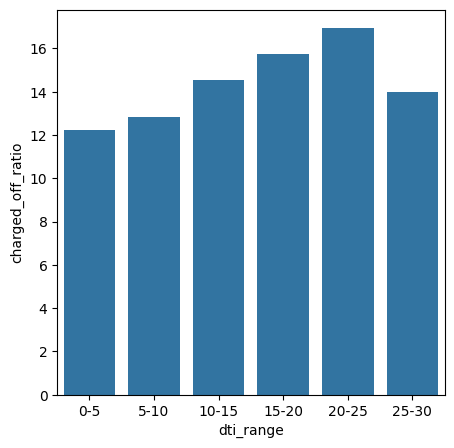

In [59]:
# Categorical Variable Analysis: dti against Charged Off Rate

data = loan.pivot_table(values = 'funded_amnt',index = 'dti_range',columns = 'loan_status',aggfunc=len)
data['total'] = data['Charged Off'] + data['Fully Paid']
data['charged_off_ratio'] = round(data['Charged Off'] / data['total'] * 100,2)
print(data.sort_values(by='charged_off_ratio', ascending=False))
plt.figure(figsize=(5, 5))
sns.barplot(x ='dti_range', y = 'charged_off_ratio', data = data)

##### Inference:
- dti describes the existing loans of applicant and how much loan amount can be sanctioned so that repayment can be hassle free
- As the Debt-to-Income (DTI) value increases, the Charged Off Rate also increases. An exception is observed in the 25-30 range due to the low population data in this range

####          Bivariate Analysis: Continuous Variables

In [60]:
# Correlation for loan_status = Charged Off
corr_df = loan[loan.loan_status == 'Charged Off'].corr()
corr_df

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate_percent,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util_percent,total_acc,pub_rec_bankruptcies,issue_year
loan_amnt,1.000000,0.979222,0.907366,0.352044,0.925892,0.452431,0.067486,0.006012,0.176673,-0.047390,0.044055,0.274536,-0.027576,0.117729
funded_amnt,0.979222,1.000000,0.927367,0.355057,0.953761,0.444224,0.064319,0.006046,0.173053,-0.051988,0.048082,0.265327,-0.032159,0.130899
funded_amnt_inv,0.907366,0.927367,1.000000,0.370885,0.858137,0.404285,0.075763,-0.018461,0.145443,-0.052716,0.066945,0.243871,-0.028048,0.313122
int_rate_percent,0.352044,0.355057,0.370885,1.000000,0.328790,0.169159,0.042600,0.060161,0.037003,0.080928,0.380622,-0.013073,0.079341,0.180208
installment,0.925892,0.953761,0.858137,0.328790,1.000000,0.450994,0.047018,0.016295,0.170655,-0.040347,0.076206,0.240567,-0.025422,0.028244
annual_inc,0.452431,0.444224,0.404285,0.169159,0.450994,1.000000,-0.056536,0.062474,0.274863,0.000558,0.094358,0.372765,0.006403,-0.006158
dti,0.067486,0.064319,0.075763,0.042600,0.047018,-0.056536,1.000000,-0.029946,0.302755,0.008248,0.229008,0.277437,0.019782,0.093231
inq_last_6mths,0.006012,0.006046,-0.018461,0.060161,0.016295,0.062474,-0.029946,1.000000,0.079441,0.014715,-0.134666,0.102441,0.007585,-0.086363
open_acc,0.176673,0.173053,0.145443,0.037003,0.170655,0.274863,0.302755,0.079441,1.000000,0.049896,-0.058518,0.683694,0.060829,-0.003792
pub_rec,-0.047390,-0.051988,-0.052716,0.080928,-0.040347,0.000558,0.008248,0.014715,0.049896,1.000000,0.059581,0.016488,0.859037,-0.017091


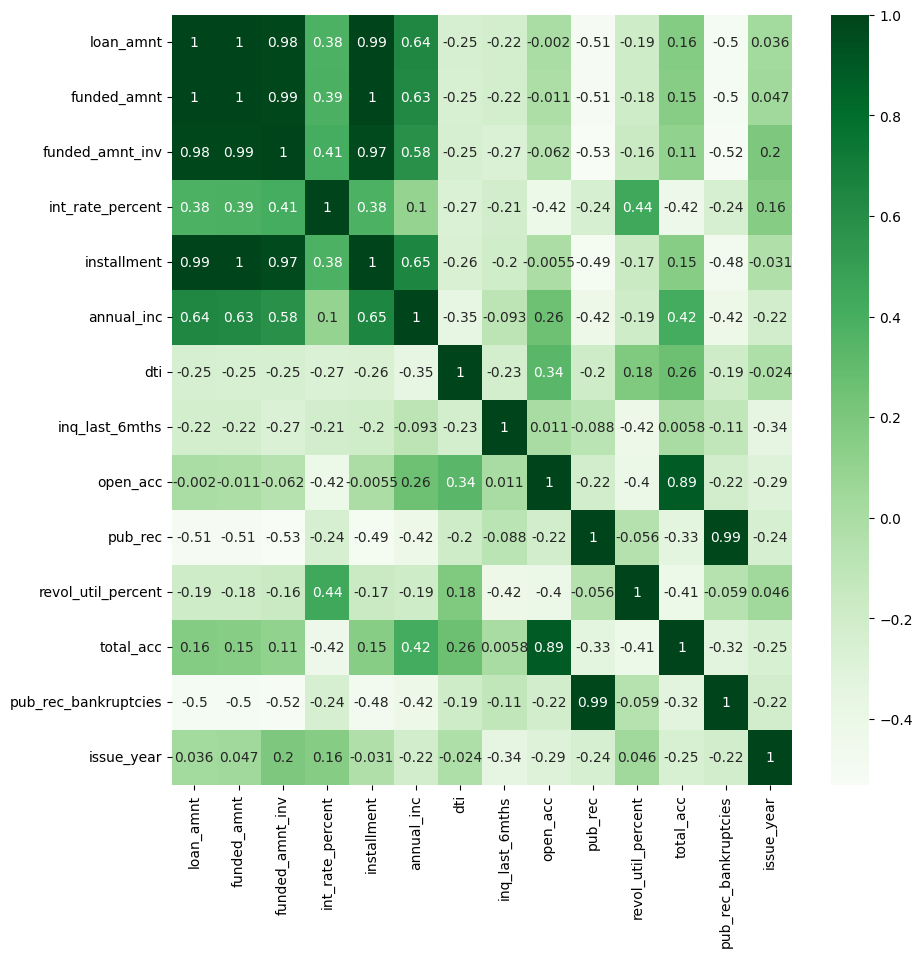

In [61]:
# Heatmap of correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(corr_df.corr(), annot=True, cmap='Greens')
plt.show()

##### Inference from Correlation:

- Installment, funded amount, loan amount, and funded amount by investors are highly positively correlated with each other, forming a cluster.
- Interest rate percentage is negatively correlated with total accounts.

## Conclusion:

#### Major Driving factors which can be used to predict defaulters and avoid Credit Loss
    1.Purpose
    2.funded_amnt
    3.home_ownership
    4.emp_length
    5.term
    6.interest_rate_percent
    7.dti
    8.grade

- Loans for purpose of Small Business, renewable_energy.
- When funded amount by investor is between 29k-35k
- home_ownership results in higher chance of default, except when purpose is moving, house or renewable energy
- Charged offs are more when employement length is 10 years 
- Poeple who have taken loan with longer months(60 term) with more amounts
- Loans having interest rate more than 15% having chance of defaulting.
- Higher dti(Debt-to-income) has higher chance of defaulting.
- Borrowers with least grades like E,F,G indicates high chance of defaulting